# 데이터 이해

## 데이터의 종류
> 스키마(schema) : 데이터 구조와 제약 조건에 대한 것들을 정의한 것

- 정형 데이터(Structure Data) 
> 고정된 필드(스키마를 철저히 따른)에 저장된 데이터<br>
  예) 관계형 데이터 베이스, 스프레드시트(excel)

- 반정형 데이터(Semi-Structure Data)
> 고정된 필드에 저장되어 있지는 않지만, 메타데이터나 스키마를 포함하는 데이터<br>
> 예) XML,HTML,JSON, 이메일 등

- 비정형 데이터(Unstructure-Data)
> 고정된 필드에 저장되어 있지 않는 데이터<br>
> 예) 텍스트, 이미지, 동영상, 음성 데이터 등

## 데이터 유형

### 수치형 데이터(정량적 데이터, Quantitative Data)
> 수학적인 활용 가능<br>
> 예) 나이, 키, 온도 등

- 연속형 : 실수로도 표현 가능
- 이산형 : 정수로만 표현 가능(실수형 불가능)

### 범주형 데이터(Categorical Data)
> 범주 또는 그룹으로 나타내는 데이터<br>
> 예) 교과목 성적, 성별, 영화 별점, 우편번호

- 순서형 데이터 : 순서 관계 O
- 명목형 데이터 : 순서 관계 X

# EDA (Exploratory Data Analysis)
> 탐색적 데이터 분석<br>
>>데이터를 분석하고 결과를 도출하는 과정에서 지속적으로 데이터에 대한 탐색과 이해를 기본적으로 가져야 한다는 의미

## 분석 방법

### 상관계수
> 각 column간의 상관관계의 정도를 나타내는 수치


### 왜도(Skewness)
> 데이터 분포의 비대칭도를 나타내는 통계량<br>
>> 음수: 왼쪽으로 긴 꼬리 / 오른쪽으로 치우친 분포<br>
>> 양수: 오른쪽으로 긴 꼬리 / 왼쪽으로 치우친 분포<br>
>> 0 : 좌우 대칭인 분포


- DataFrame.skew()


### 첨도(kurtosis)
> 분포의 뾰족한 정도를 나타내는 지표
>> 관측치들이 얼마나 중심에 집중적으로 몰려있는지 측정<br>
>> 음수: 정규분포보다 더 완만한 분포<br>
>> 양수: 정규분포보다 더 뾰족한 분포

- DataFrame.kurt()

### 이상치
> 이상치가 있으면 데이터 분포를 왜곡시킬 수 있다. -> 이상치 확인 필요

- boxplot 활용

## 데이터 분석

In [1]:
# 타이타닉 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
##데이터 확인

In [6]:
titanic.shape

(891, 15)

In [7]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 수치형 데이터 분석

In [11]:
#수치형 데이터만 불러오기
titanic_number = titanic.select_dtypes(include=np.number)
titanic_number

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [12]:
titanic_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [13]:
titanic_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [14]:
#통계적 분석
titanic_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### EDA 해석
- age 
> 평균과 중위수가 비슷하고 75%까지 40이 채 넘지 않는 것으로 보아 승객분들의 연령은 대체로 젊은층으로 보입니다. <br>
- fare 
> 평균과 중위수의 차이가 존재하므로 데이터의 왼쪽으로 쏠림 현상이 존재하는 것으로 보입니다.

    


In [15]:
#왜도
titanic_number.skew()  

survived    0.478523
pclass     -0.630548
age         0.389108
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64

#### age 통계적 분석

In [16]:
titanic_number['age'].sum()   #총합

21205.17

In [17]:
titanic_number['age'].mean()   #평균

29.69911764705882

In [18]:
titanic_number['age'].var()   #분산

211.0191247463081

In [19]:
titanic_number['age'].std()   #표준편차

14.526497332334044

In [20]:
titanic_number['age'].median()   #중앙값

28.0

In [21]:
titanic_number['age'].min()   #최소값

0.42

In [22]:
titanic_number['age'].max()   #최대값

80.0

In [23]:
titanic_number['age'].quantile([0.25,0.5,0.75])   #분위수 계산

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

#### 첨도 분석

In [24]:
titanic_number['age'].kurt()   

0.17827415364210353

<AxesSubplot:ylabel='Frequency'>

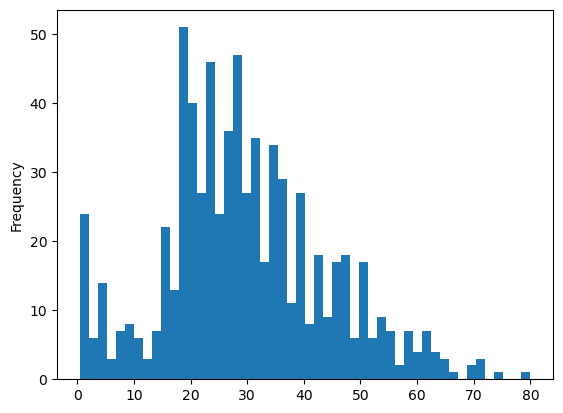

In [25]:
titanic_number['age'].plot.hist(bins=50)

<AxesSubplot:>

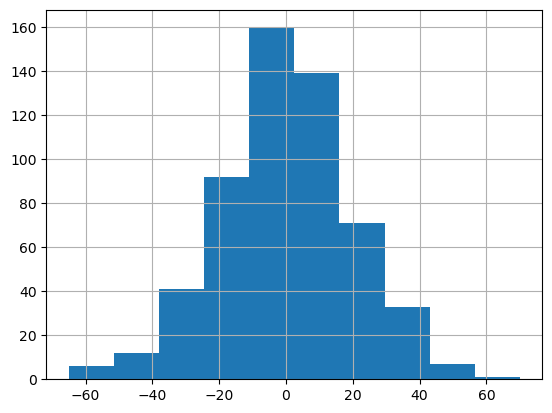

In [26]:
#diff() 
#한 객체 내에서 열과 열 / 행과 행의 차이 출력

titanic_number['age'].diff().hist()

#### 왜도 분석

In [27]:
titanic_number['fare'].skew()

4.787316519674893

<AxesSubplot:ylabel='Frequency'>

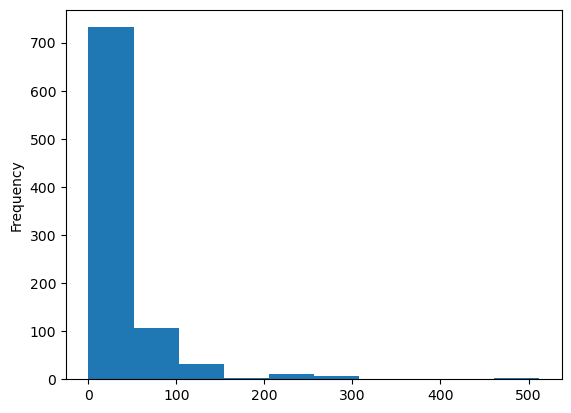

In [28]:
titanic_number['fare'].plot.hist()  #왼쪽으로 치우침

<AxesSubplot:>

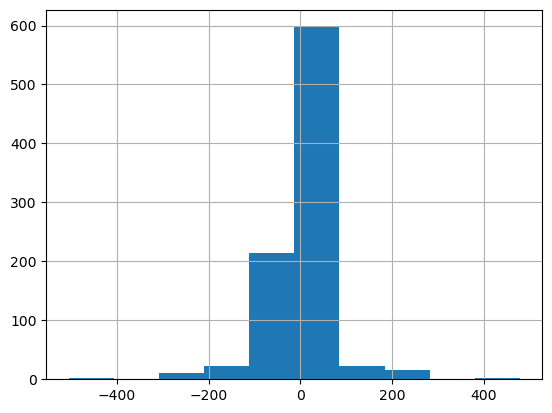

In [29]:
titanic_number['fare'].diff().hist()

#### 이상치 분석

<AxesSubplot:ylabel='age'>

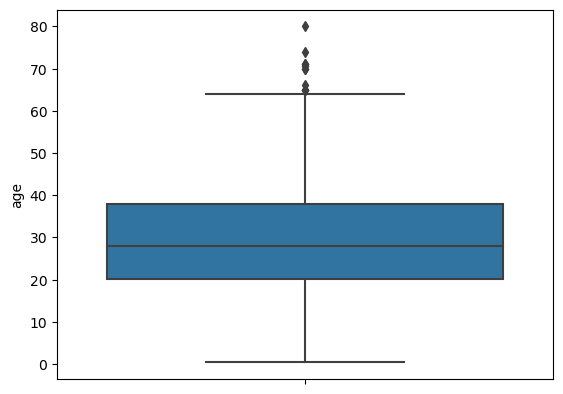

In [30]:
sns.boxplot(y=titanic_number['age'], data=titanic)

#20-30대 젊은층이 대부분

<AxesSubplot:xlabel='sex', ylabel='age'>

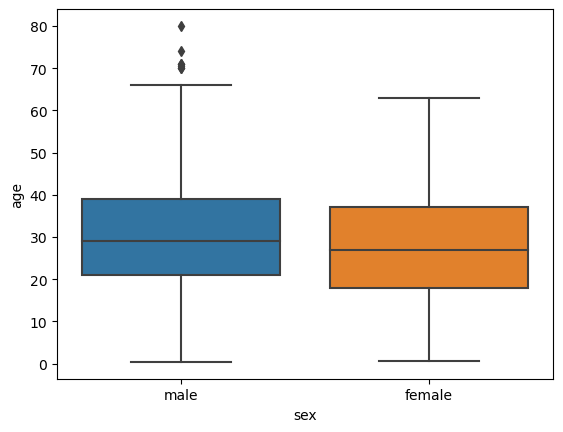

In [31]:
#성별 나이
sns.boxplot(x=titanic['sex'],y=titanic['age'],data=titanic)

#남성분들의 나이가 비교적 많습니다.

<AxesSubplot:xlabel='survived', ylabel='age'>

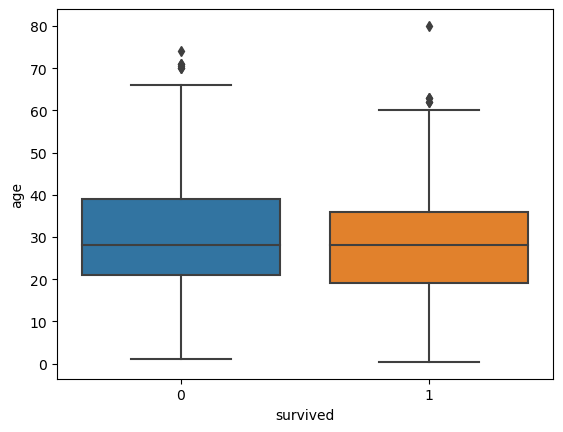

In [32]:
#나이별 생존 유무
sns.boxplot(x=titanic['survived'], y=titanic['age'],data=titanic)

#### 상관관계 분석

In [33]:
titanic_number.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='pclass', ylabel='fare'>

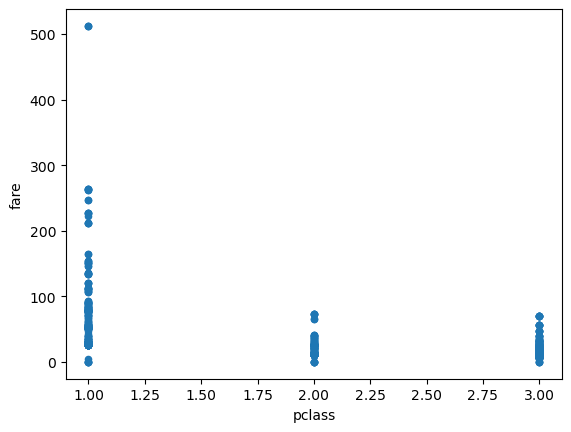

In [34]:
titanic_number.plot(kind='scatter', x='pclass', y='fare')

<AxesSubplot:xlabel='age', ylabel='fare'>

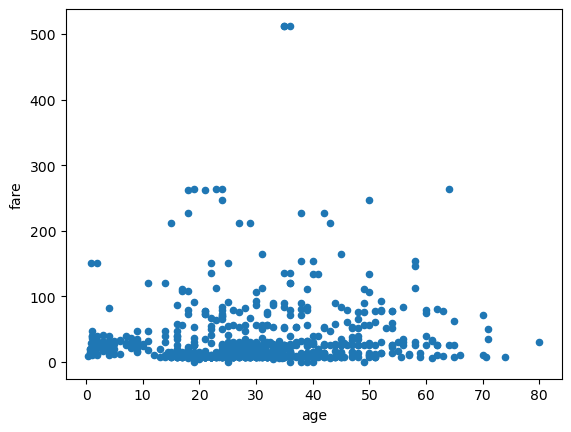

In [35]:
titanic_number.plot(kind='scatter',x='age',y='fare')

##### 히트맵

<AxesSubplot:>

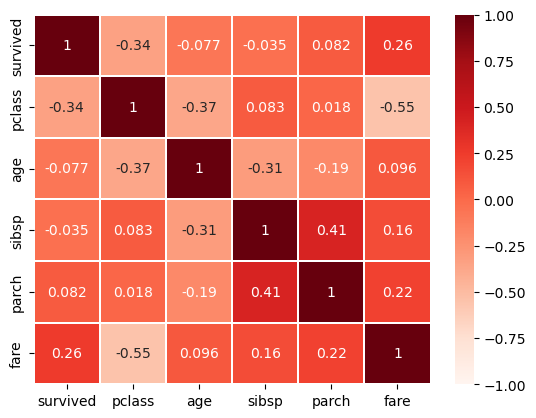

In [36]:
sns.heatmap(titanic_number.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')

### 범주형 데이터 분석 

In [60]:
#수치형 제외하고 범주형만 조회
titanic_object = titanic.select_dtypes(exclude=np.number)
titanic_object

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [61]:
titanic_object = titanic_object.join(titanic_number['survived']) #생존 변수 추가
titanic_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   embarked     889 non-null    object  
 2   class        891 non-null    category
 3   who          891 non-null    object  
 4   adult_male   891 non-null    bool    
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
 9   survived     891 non-null    int64   
dtypes: bool(2), category(2), int64(1), object(5)
memory usage: 45.8+ KB


In [65]:
titanic_object['survived'] = titanic_object['survived'].astype('object') #타입 변경
titanic_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   embarked     889 non-null    object  
 2   class        891 non-null    category
 3   who          891 non-null    object  
 4   adult_male   891 non-null    bool    
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
 9   survived     891 non-null    object  
dtypes: bool(2), category(2), object(6)
memory usage: 45.8+ KB


In [66]:
titanic_object.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,male,S,Third,man,True,NaN,Southampton,no,False,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1
3,female,S,First,woman,False,C,Southampton,yes,False,1
4,male,S,Third,man,True,NaN,Southampton,no,True,0


In [67]:
#통계적 분석
titanic_object.describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
count,891,889,891,891,891,203,889,891,891,891
unique,2,3,3,3,2,7,3,2,2,2
top,male,S,Third,man,True,C,Southampton,no,True,0
freq,577,644,491,537,537,59,644,549,537,549


#### 통계적 분석

##### embarked 통계적 분석

In [69]:
#고유값 개수
titanic_object['embarked'].nunique()

3

In [72]:
#고유값
titanic_object['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [74]:
#최빈값
titanic_object['embarked'].mode()

0    S
Name: embarked, dtype: object

In [79]:
#범주별 개수
titanic_object['embarked'].value_counts()
titanic_object['embarked'].value_counts(normalize=True) #비율

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

#### 교차분석
- pd.crosstab()
> values: 두 행/열에 따라 집계할 값(반드시 aggfunc와 함께 사용)<br>
> aggfunc: 집계 함수(mean, sum 등)<br>
> margins: True인 경우, 행/열의 소계값이 함게 산출

In [82]:
pd.crosstab(titanic_object['sex'],titanic_object['survived'],margins=True)

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
#성별별 생존 비율 

In [89]:
#전체데이터 기준
pd.crosstab(titanic_object['sex'],titanic_object['survived'],margins=True,normalize='all')  

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [90]:
#성별 기준 
pd.crosstab(titanic_object['sex'],titanic_object['survived'],margins=True,normalize='index')  

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [91]:
#생존 유무 기준
pd.crosstab(titanic_object['sex'],titanic_object['survived'],margins=True,normalize='columns')  

survived,0,1,All
sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


### pivot_table 분석

In [93]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [94]:
# pclass와 성별 간 생존률, 생존자 수 파악

In [99]:
df_pivot = pd.pivot_table(titanic, 
                               index='pclass',
                               columns='sex',
                               values='survived',
                               aggfunc = ['mean','sum'])
df_pivot

mean              sum     
sex       female      male female male
pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

1호실 여성의 생존율은 약 97% , 남성은 약 37% <br>
3호실 여성의 생존율은 약 50% , 남성은 약 14% <br>

1호실보다 3호실 탑승객들의 사고피해가 크고 여성보다 남성의 피해가 크다는 것을 알 수있다.

In [104]:
df_pivot = pd.pivot_table(titanic, 
                    index=['pclass','sex'],
                    columns='survived',
                    values=['age','fare'],
                    aggfunc=['mean','max'])
df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass sex                                                                
1      female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
2      female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
3      female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
pclass sex                       
1      female  151.55  512.3292  
       male    263.00  512.3292  
2      female   26.00   65.0000  
       male     73.50   39.0000  
3      female   69.55   31.3875  
       male     69.55   56.4958

1호실 여성들의 지불비용 평균이 가장 높음 / 
1호실 남성들의 연령평균이 가장 높음